In [218]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
encoder = LabelEncoder()
path = r'C:\Users\HP\Downloads\titanic-passengers.csv'
data = pd.read_csv(path, sep=';')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [163]:
print(data.isnull().sum())
data.isnull().sum().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


866

In [164]:
data['Age'].fillna(data['Age'].median(), inplace = True)
print(data['Embarked'].value_counts())
data['Embarked'].fillna('S', inplace = True)
data.dropna(axis=1, how='any', thresh=600,inplace= True)
print(data.isnull().sum().sum()) #verified

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0


In [165]:
data['Survived'] = encoder.fit_transform(data['Survived'])
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Title']= data['Name'].str.extract(pat =' ([A-Za-z]+)\.') 
del data['Name']

In [166]:
Title_Dictionary = {

                    "Capt":       "0",

                    "Col":        "0",

                    "Major":      "0",

                      "Dr":         "0",

                    "Rev":        "0",

                    "Jonkheer":   "1",

                    "Don":        "1",

                    "Sir" :       "1",

                   "Lady" :      "1",

                  "the Countess": "1",
    
                     "Countess": "1",

                    "Dona":       "1",

                    "Mme":        "2",

                    "Mlle":       "2",

                    "Miss" :      "2",

                    "Ms":         "3",

                    "Mr" :        "3",

                    "Mrs" :       "3",

                    "Master" :    "4",
                    "Officer":    "5",
                    "Royalty": "6"

                    }
data.replace(Title_Dictionary, inplace = True)
data['FamilySize']= data["Parch"] + data["SibSp"]
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,248740,13.0000,S,3,0
1,76,0,3,1,25.0,0,0,348123,7.6500,S,3,0
2,641,0,3,1,20.0,0,0,350050,7.8542,S,3,0
3,568,0,3,0,29.0,0,4,349909,21.0750,S,3,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,S,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,C,3,1
887,61,0,3,1,22.0,0,0,2669,7.2292,C,3,0
888,535,0,3,0,30.0,0,0,315084,8.6625,S,2,0
889,102,0,3,1,28.0,0,0,349215,7.8958,S,3,0


In [185]:
x=data[['Title','Age','Fare','Sex','FamilySize','Pclass']]
y=data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%


In [186]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


In [187]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test,y_pred, rownames= ['Fare'], colnames=['Survived'])
print(confusion_matrix)

Survived    0   1
Fare             
0         163  26
1          30  93


In [188]:
# classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       189
           1       0.78      0.76      0.77       123

    accuracy                           0.82       312
   macro avg       0.81      0.81      0.81       312
weighted avg       0.82      0.82      0.82       312



In [223]:
#Defining a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


AUC: 0.95


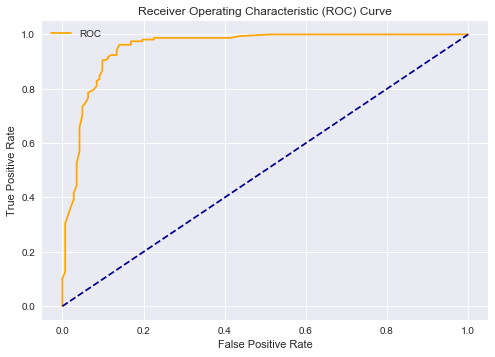

In [224]:
#Generate sample data.
data, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
trainX, testX, trainy, testy = train_test_split(data, class_label, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(trainX, trainy)
probs = model.predict_proba(testX)
probs = probs[:, 1]
auc = roc_auc_score(testy, probs) #Compute the AUC Score.
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)



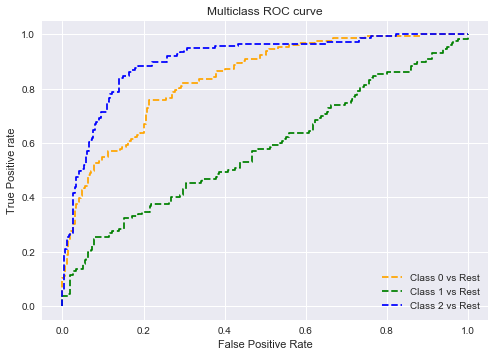

In [225]:
#fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


In [ ]:
#In general, An ROC curve is a commonly used way to visualize the performance of a binary classifier,
#meaning a classifier with two possible output classes.
#ROC curve is used to quantify the performance of a classifier, and give a higher score for this classifier than this classifier. 
#That is the purpose of AUC, which stands for Area Under the Curve which is literally just the percentage 
#area that is under the curve.

